In [ ]:
#most positive, most negative, largest range, biggest reversal
# Load necessary libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import gdown
import os

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
file_id = "106re38r_Ix5r8iPmkNlFfvZg_QsW05_s"
download_url =  f"https://drive.google.com/uc?id={file_id}"
output_path = "data.xlsm"
gdown.download(download_url, output_path, quiet=False)

file_path = os.path.join(os.getcwd(), "data.xlsm")

try:
    # Read each sheet into a DataFrame
    mimic3d_df = pd.read_excel(file_path, sheet_name='mimic3d', engine='openpyxl')
    sheet2_df = pd.read_excel(file_path, sheet_name='Sheet2', engine='openpyxl')

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

c:\Users\pecko\anaconda3\envs\data-analytics\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():


In [ ]:
mimic3d_df

,hadm_id,gender,Gender,age,Age group,age.1,Adult,Teen,Middle Age,Child,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,1,35,Adult,1,1,0,0,0,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,0,59,Senior,4,0,0,0,0,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,1,48,Middle Age,3,0,0,1,0,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,1,73,Senior,4,0,0,0,0,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,0,60,Senior,4,0,0,0,0,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,M,0,60,Senior,4,0,0,0,0,...,0.20,0.13,23.11,8.01,0.00,0.08,1315.46,0,1746.31,3
58972,199994,F,1,58,Senior,4,0,0,0,0,...,2.26,0.30,7.90,0.00,0.00,0.31,674.05,0,834.98,2
58973,199995,M,0,23,Adult,1,1,0,0,0,...,0.54,0.10,6.27,5.79,0.00,0.36,207.10,0,261.30,3
58974,199998,M,0,69,Senior,4,0,0,0,0,...,0.17,0.35,12.24,17.69,0.00,1.02,426.87,0,537.42,1


In [ ]:
mimic3d_df = mimic3d_df.drop(columns=['hadm_id', 'gender', 'Age group', 'age'])

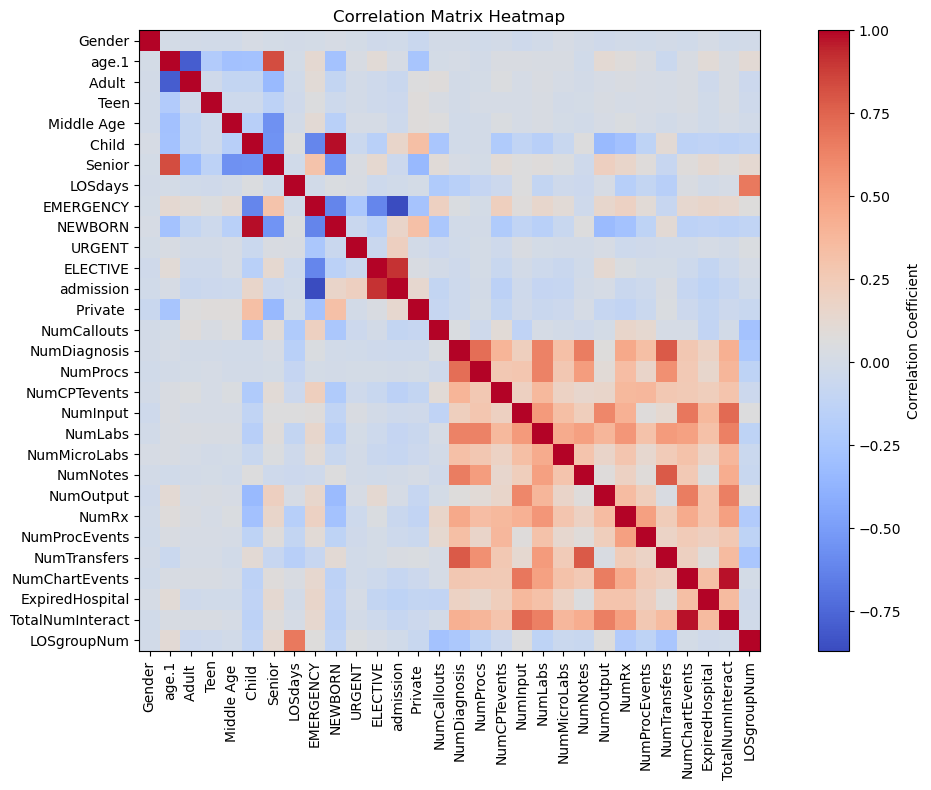

In [ ]:
# Select only numeric columns
numeric_df = mimic3d_df.select_dtypes(include=['float64', 'int64', 'boolean'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Optional: Visualize the correlation matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

In [ ]:
mimic3d_df.columns.tolist()

['Gender',
 'age.1',
 'Adult ',
 'Teen',
 'Middle Age ',
 'Child ',
 'Senior',
 'LOSdays',
 'EMERGENCY',
 'NEWBORN',
 'URGENT',
 'ELECTIVE',
 'admission',
 'AdmitDiagnosis',
 'Private ',
 'NumCallouts',
 'NumDiagnosis',
 'NumProcs',
 'AdmitProcedure',
 'NumCPTevents',
 'NumInput',
 'NumLabs',
 'NumMicroLabs',
 'NumNotes',
 'NumOutput',
 'NumRx',
 'NumProcEvents',
 'NumTransfers',
 'NumChartEvents',
 'ExpiredHospital',
 'TotalNumInteract',
 'LOSgroupNum',
 'insurance_Medicaid',
 'insurance_Medicare',
 'insurance_Private',
 'insurance_Self Pay',
 'religion_BAPTIST',
 'religion_BUDDHIST',
 'religion_CATHOLIC',
 'religion_CHRISTIAN SCIENTIST',
 'religion_EPISCOPALIAN',
 'religion_GREEK ORTHODOX',
 'religion_HEBREW',
 'religion_HINDU',
 "religion_JEHOVAH'S WITNESS",
 'religion_JEWISH',
 'religion_LUTHERAN',
 'religion_METHODIST',
 'religion_MUSLIM',
 'religion_NOT SPECIFIED',
 'religion_OTHER',
 'religion_PROTESTANT QUAKER',
 'religion_ROMANIAN EAST. ORTH',
 'religion_UNITARIAN-UNIVERSALIST

In [ ]:
# 1. One-Hot Encoding for Nominal Categorical Variables
one_hot_columns = ["insurance", "religion", "marital_status", "ethnicity", "admit_location", "admit_type"]
mimic3d_df = pd.get_dummies(mimic3d_df, columns=one_hot_columns, drop_first=True)

# 2. Label Encoding for Ordinal Categorical Variables
label_encoder = LabelEncoder()
ordinal_columns = ["Age group"]
for col in ordinal_columns:
    mimic3d_df[col] = label_encoder.fit_transform(mimic3d_df[col])

# 3. TF-IDF Encoding for Text-Heavy Columns
tfidf_columns = ["AdmitProcedure", "AdmitDiagnosis"]
for col in tfidf_columns:
    tfidf = TfidfVectorizer(max_features=50)  # Limit features to 50 for simplicity
    tfidf_matrix = tfidf.fit_transform(mimic3d_df[col].fillna("na"))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{col}_{i}" for i in range(50)])
    mimic3d_df = pd.concat([mimic3d_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
    mimic3d_df.drop(columns=[col], inplace=True)

KeyError: "None of [Index(['insurance', 'religion', 'marital_status', 'ethnicity',\n       'admit_location', 'admit_type'],\n      dtype='object')] are in the [columns]"

In [ ]:
mimic3d_df.columns.tolist()

['Gender',
 'age.1',
 'Adult ',
 'Teen',
 'Middle Age ',
 'Child ',
 'Senior',
 'LOSdays',
 'EMERGENCY',
 'NEWBORN',
 'URGENT',
 'ELECTIVE',
 'admission',
 'AdmitDiagnosis',
 'Private ',
 'NumCallouts',
 'NumDiagnosis',
 'NumProcs',
 'AdmitProcedure',
 'NumCPTevents',
 'NumInput',
 'NumLabs',
 'NumMicroLabs',
 'NumNotes',
 'NumOutput',
 'NumRx',
 'NumProcEvents',
 'NumTransfers',
 'NumChartEvents',
 'ExpiredHospital',
 'TotalNumInteract',
 'LOSgroupNum',
 'insurance_Medicaid',
 'insurance_Medicare',
 'insurance_Private',
 'insurance_Self Pay',
 'religion_BAPTIST',
 'religion_BUDDHIST',
 'religion_CATHOLIC',
 'religion_CHRISTIAN SCIENTIST',
 'religion_EPISCOPALIAN',
 'religion_GREEK ORTHODOX',
 'religion_HEBREW',
 'religion_HINDU',
 "religion_JEHOVAH'S WITNESS",
 'religion_JEWISH',
 'religion_LUTHERAN',
 'religion_METHODIST',
 'religion_MUSLIM',
 'religion_NOT SPECIFIED',
 'religion_OTHER',
 'religion_PROTESTANT QUAKER',
 'religion_ROMANIAN EAST. ORTH',
 'religion_UNITARIAN-UNIVERSALIST

In [ ]:
# Prepare data
target = 'LOSgroupNum'
predictors = mimic3d_df.drop(columns=[target])  # Drop target and ID column

# Convert categorical variables to dummy variables (one-hot encoding)
predictors = pd.get_dummies(predictors, drop_first=True)

# Handle missing values
predictors = predictors.fillna(0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, mimic3d_df[target], test_size=0.2, random_state=42)



In [ ]:
X_train.describe()

,Gender,age.1,Adult,Teen,Middle Age,Child,Senior,LOSdays,EMERGENCY,NEWBORN,...,AdmitProcedure_Vertebral fx repair,AdmitProcedure_Vesic fistula repair NEC,AdmitProcedure_Vessel operation NEC,AdmitProcedure_Video/radio eeg monitor,AdmitProcedure_Vitreous operation NEC,AdmitProcedure_Whole blood transfus NEC,AdmitProcedure_Wide excision of lip les,AdmitProcedure_Wound irrigation NEC,AdmitProcedure_Wrist synovectomy,AdmitProcedure_na
count,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,...,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.000000,47180.0,47180.000000
mean,0.441543,3.536456,0.054748,0.010068,0.140504,0.138660,0.656019,10.163434,0.713396,0.134294,...,0.000911,0.000021,0.000021,0.000382,0.000021,0.000021,0.000021,0.000021,0.0,0.136414
std,0.496576,0.772856,0.227490,0.099833,0.347513,0.345596,0.475040,12.587438,0.452180,0.340972,...,0.030176,0.004604,0.004604,0.019529,0.004604,0.004604,0.004604,0.004604,0.0,0.343231
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.420000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.830000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,206.420000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
# Convert boolean columns to integers
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # One output for regression

    def forward(self, x):
        return self.linear(x)

input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.cpu().numpy()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Gender                                     float64
age.1                                      float64
Adult                                      float64
Teen                                       float64
Middle Age                                 float64
                                            ...   
AdmitProcedure_Whole blood transfus NEC    float64
AdmitProcedure_Wide excision of lip les    float64
AdmitProcedure_Wound irrigation NEC        float64
AdmitProcedure_Wrist synovectomy           float64
AdmitProcedure_na                          float64
Length: 17065, dtype: object
Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


ValueError: Input contains NaN.